In [1]:
import torch
import torch.nn as nn

In [2]:
# trying alexnet

alex_net = nn.Sequential(
            nn.Conv2d(1,96,kernel_size=4, padding=1, stride=2),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),nn.Flatten(),
            nn.Linear(3456, 120), nn.ReLU(), nn.Dropout(p=0.5),
            nn.Linear(120, 10)
)

In [3]:
X = torch.randn(1,1,28,28)
X.shape

torch.Size([1, 1, 28, 28])

In [4]:
def look_at_net(net, X):
    
    for layer in net:
        X = layer(X)
        print(f' For {layer.__class__.__name__}, shape : {X.shape}')

In [5]:
look_at_net(alex_net, X)

 For Conv2d, shape : torch.Size([1, 96, 14, 14])
 For ReLU, shape : torch.Size([1, 96, 14, 14])
 For MaxPool2d, shape : torch.Size([1, 96, 6, 6])
 For Flatten, shape : torch.Size([1, 3456])
 For Linear, shape : torch.Size([1, 120])
 For ReLU, shape : torch.Size([1, 120])
 For Dropout, shape : torch.Size([1, 120])
 For Linear, shape : torch.Size([1, 10])


In [6]:
# Reading the dataset
batch_size = 128

# we will be resizing the dataset offashion mnist so that it fits alex nets

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets


my_transforms = transforms.Compose(
                [transforms.ToTensor()]
)

train_dataset = datasets.FashionMNIST(download=True,root="../data", train=True, transform=my_transforms)
test_dataset = datasets.FashionMNIST(download=True, root="../data", train=False, transform=my_transforms)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

0it [00:00, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw
Processing...
Done!


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729141890/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(alex_net.parameters(), lr = 0.001, momentum=0.9)

In [8]:
def accuracy(y_hat,y):
    return (y_hat.argmax(1)==y).sum()

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
def full_accuracy(net, data_iter):
    net.eval()
#     device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'
    net = net.to(device)
    
    total_acc = 0
    total_num = 0
    with torch.no_grad():
        for X, y in data_iter:
            X = X.to(device)
            y = y.to(device)

            y_hat = net(X)

            total_acc += accuracy(y_hat, y)
            total_num += y.numel()
    
    return total_acc/total_num

In [11]:
def train_net(net):
    
    train_loss = []
    train_acc = []
    test_acc = []
    num_epochs=10

    net= net.to(device)
    for epoch in range(num_epochs):

        acc_value = 0
        total_number = 0
        total_loss= 0
        for i, data in enumerate(train_dataloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


            total_loss += loss.item()
            acc_value += accuracy(outputs, labels)
            total_number += labels.numel()

        with torch.no_grad():

            print(f"\tEpoch {epoch} : Statistics: ")
            print(f'\tcurrent train loss : {float(total_loss/total_number)}')
            print(f'\tcurrent train acc : {float(acc_value/total_number)}')
            print(f'\tcurrent test acc : {float(full_accuracy(net, test_dataloader))}')


            train_loss.append(float(total_loss/total_number))
            test_acc.append(float(full_accuracy(net, test_dataloader)))
            train_acc.append(float(acc_value/total_number))
    
    return train_loss, test_acc, train_acc

        

In [12]:
train_loss, test_acc, train_acc = train_net(alex_net)



	Epoch 0 : Statistics: 
	current train loss : 0.011866307868560156
	current train acc : 0.48144999146461487
	current test acc : 0.6798999905586243
	Epoch 1 : Statistics: 
	current train loss : 0.0062104580183823905
	current train acc : 0.7237666845321655
	current test acc : 0.7294999957084656
	Epoch 2 : Statistics: 
	current train loss : 0.005231521392862002
	current train acc : 0.7557333111763
	current test acc : 0.7516000270843506
	Epoch 3 : Statistics: 
	current train loss : 0.004757832536101341
	current train acc : 0.7741333246231079
	current test acc : 0.7750999927520752
	Epoch 4 : Statistics: 
	current train loss : 0.0044316852514942485
	current train acc : 0.7902833223342896
	current test acc : 0.791100025177002
	Epoch 5 : Statistics: 
	current train loss : 0.0041778710881869
	current train acc : 0.8049333095550537
	current test acc : 0.8043000102043152
	Epoch 6 : Statistics: 
	current train loss : 0.003977500350276629
	current train acc : 0.815850019454956
	current test acc : 0

finished


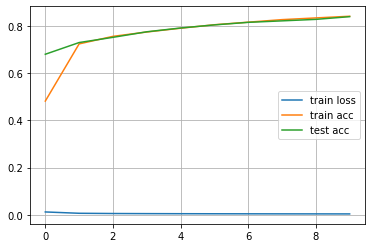

In [13]:
print("finished")

import matplotlib.pyplot as plt
num_epochs = 10
plt.plot(range(num_epochs), train_loss, label='train loss')
plt.plot(range(num_epochs), train_acc, label = 'train acc')
plt.plot(range(num_epochs), test_acc, label = 'test acc')
plt.grid(True)
plt.legend()
plt.show()